In [ ]:
#trauning a model

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r'C:Ecommerce Customers.csv')
dataset

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
#drop unnecessaty columns
dataset=dataset.drop(['Email', 'Address', 'Avatar'], axis=1)

In [9]:
#Define X and y features
X=dataset[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y=dataset['Yearly Amount Spent']

In [14]:
#Scale the features
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
#split the data into training an test datadata 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
#train the linear regression model
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
#print parameters
model.coef_

array([25.38048395, 38.52241606,  0.31332774, 61.79022522])

In [19]:
model.intercept_

499.45371055670375

In [20]:
#evaluate the models 
y_pred= model.predict(X_test)

In [21]:
#calculate the perfomance
mse= mean_squared_error(y_test, y_pred)
rse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)

In [22]:
mse

109.8637411839402

In [23]:
rse

10.481590584636486

In [24]:
r2

0.9778130629184126

<function matplotlib.pyplot.show(close=None, block=None)>

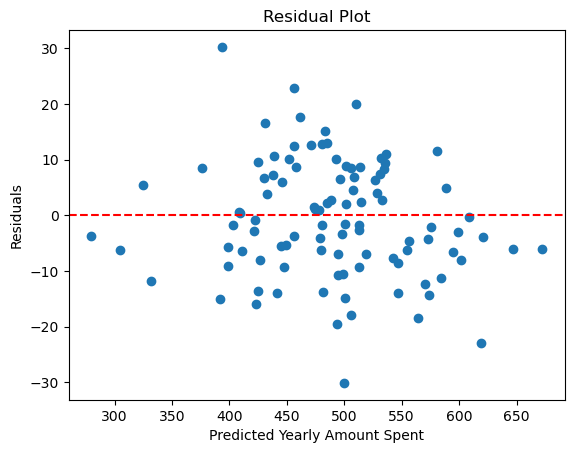

In [26]:
#visualize the residuals
residuals= y_test- y_pred
plt.scatter(y_pred,residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yearly Amount Spent')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show

In [27]:
#perform cross-validation
scores= cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
scores

array([0.98274654, 0.9821047 , 0.98717189, 0.9842572 , 0.98219012])

In [28]:
scores.mean()

0.9836940897539079

In [29]:
#save the model and scaler 
import joblib
joblib.dump(model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [31]:
#example predict for a new user
#replace with actual values for a new user
new_user=np.array([[33.5,12.5,37.0,4.0]])
new_user_scaled= scaler.transform(new_user)
prediction= model.predict(new_user_scaled)
print(prediction)

[557.10568392]


C:\Users\Grind master\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
